In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Load some house value vs. crime rate data

In [2]:
sales = pd.read_csv("Philadelphia_Crime_Rate_noNA.csv")

In [3]:
sales.head()

,HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
0,140463,14.0463,29.7,10.0,-1.0,Abington,Montgome
1,113033,11.3033,24.1,18.0,4.0,Ambler,Montgome
2,124186,12.4186,19.5,25.0,8.0,Aston,Delaware
3,110490,11.0490,49.4,25.0,2.7,Bensalem,Bucks
4,79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks


In [4]:
sales.shape

(99, 7)

## Explorating the data

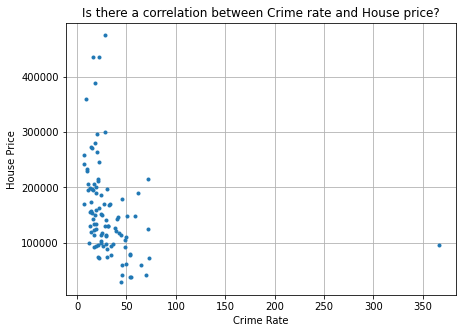

In [11]:
plt.figure(figsize=(7, 5))
plt.plot(
    sales.CrimeRate,
    sales.HousePrice,
    marker='.',
    linestyle=''
)
plt.xlabel("Crime Rate")
plt.ylabel("House Price")
plt.title("Is there a correlation between Crime rate and House price?")
plt.grid()
plt.show()

* It can be observed, the **house price** in the town is correlated with the **crime rate** of the town.

## Fit the regression model using crime as the feature

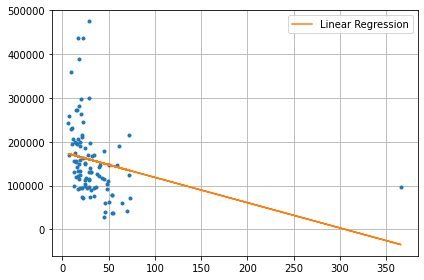

In [18]:
from sklearn.linear_model import LinearRegression

# define the feature matrix
feature_cols = ['CrimeRate']
X  = sales[feature_cols]
y = sales.HousePrice

# fit the model
linreg = LinearRegression()
linreg.fit(X, y)

# draw a scatter plot
plt.plot(
    sales[feature_cols],
    sales.HousePrice,
    marker='.',
    linestyle=''
)

predicted_prices = linreg.predict(sales[feature_cols])

plt.plot(
    sales[feature_cols],
    predicted_prices,
    label='Linear Regression'
)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

* We do see a trend, **house prices decrease as the crime rate increases**.

* The **outlier heavily influenced** the linear regression.

## Remove Center City and redo the analysis

Center City is the one observation with an extremely high crime rate, yet house prices are not very low

In [8]:
# Center city is where that MilesPhila is 0.0
without_cc = sales[sales.MilesPhila != 0.0]

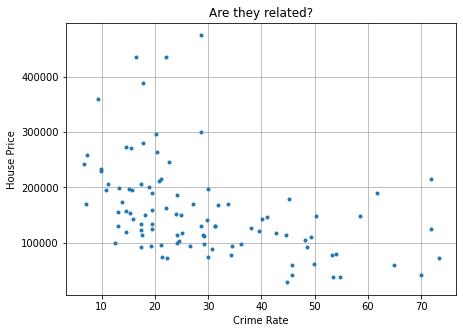

In [10]:
plt.figure(figsize=(7, 5))
plt.plot(
    without_cc.CrimeRate,
    without_cc.HousePrice,
    marker='.',
    linestyle=''
)
plt.xlabel("Crime Rate")
plt.ylabel("House Price")
plt.title("Are they related?")
plt.grid()
plt.show()

### Refit our simple regression model on this modified dataframe

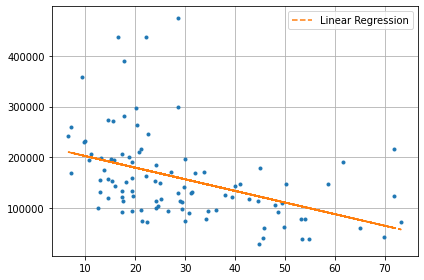

In [16]:
from sklearn.linear_model import LinearRegression

# define the feature matrix
feature_cols = ['CrimeRate']
X  = without_cc[feature_cols]
y = without_cc.HousePrice

# fit the model
linreg_nocc = LinearRegression()
linreg_nocc.fit(X, y)

plt.plot(
    without_cc[feature_cols],
    without_cc.HousePrice,
    marker='.',
    linestyle=''
)

predicted_prices = linreg_nocc.predict(without_cc[feature_cols])

plt.plot(
    without_cc[feature_cols],
    predicted_prices,
    label='Linear Regression',
    linestyle='--',
)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

## Compare co-efficients for full-data fit vs. no-Center-City fit

In [19]:
pd.DataFrame(
    [linreg.intercept_, linreg.coef_[0]],
    index=['Intercept', 'Slope']
)

,0
Intercept,176629.408107
Slope,-576.908128


In [20]:
pd.DataFrame(
    [linreg_nocc.intercept_, linreg_nocc.coef_[0]],
    index=['Intercept', 'Slope']
)

,0
Intercept,225233.551839
Slope,-2288.689430


### Remove high-value outlier neighborhoods and redo analysis

In [80]:
sales_nohighend  = without_cc[without_cc['HousePrice'] < 350_000]

In [81]:
sales_nohighend.shape

(93, 7)

In [84]:
# fit the model
linreg_nohighend = LinearRegression()
linreg_nohighend.fit(X, y)
pd.DataFrame(
    [linreg_nocc.intercept_, linreg_nocc.coef_[0]],
    index=['Intercept', 'Coefficient']
)

,0
Intercept,199098.852670
Coefficient,-1838.562649


As it can be seen, removing the outlying high-value neighborhoods *has some impacts*. But, **not as much as high-leverage Center City datapoint.**